In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Data

In [2]:
FB_data_path = "./Fanis_Balaskas/accel_gyro.csv"
GV_data_path = "./George_Vardakas/accel_gyro_Geo.csv"
ΤT_data_path = "./George_Vardakas/accel_gyro_Ted.csv"
GP_data_path = "./George_Vardakas/accel_gyro_Gregory.csv"
BRO_data_path = "./George_Vardakas/accel_gyro_Bro.csv"
VD_data_path = "./Vagelis_Dimoulis/accel_gyro.csv"
EUH_data_path = "./George_Vardakas/accel_gyro_Euh.csv"
activities_path = "./HomoreDataFromVariousActivities/activities.csv"

df_FB_accel_gyro = pd.read_csv(FB_data_path)
df_GV_accel_gyro = pd.read_csv(GV_data_path)
df_TT_accel_gyro = pd.read_csv(ΤT_data_path)
df_GP_accel_gyro = pd.read_csv(GP_data_path)
df_BRO_accel_gyro = pd.read_csv(BRO_data_path)
df_VD_accel_gyro = pd.read_csv(VD_data_path)
df_EUH_accel_gyro = pd.read_csv(EUH_data_path)
df_activities = pd.read_csv(activities_path)

In [3]:
# Den exw ta ms gia na spasw to shma se kathgories
datetime_format = "%Y-%m-%d %H:%M:%S.%f"
df_FB_accel_gyro["TIMESTAMP"] = pd.to_datetime(df_FB_accel_gyro["TIMESTAMP"])#, format=datetime_format)
df_GV_accel_gyro["TIMESTAMP"] = pd.to_datetime(df_GV_accel_gyro["TIMESTAMP"])#, format=datetime_format)
df_TT_accel_gyro["TIMESTAMP"] = pd.to_datetime(df_TT_accel_gyro["TIMESTAMP"])
df_GP_accel_gyro["TIMESTAMP"] = pd.to_datetime(df_GP_accel_gyro["TIMESTAMP"])
df_BRO_accel_gyro["TIMESTAMP"] = pd.to_datetime(df_BRO_accel_gyro["TIMESTAMP"])
df_VD_accel_gyro["TIMESTAMP"] = pd.to_datetime(df_VD_accel_gyro["TIMESTAMP"])
df_EUH_accel_gyro["TIMESTAMP"] = pd.to_datetime(df_EUH_accel_gyro["TIMESTAMP"])

## Find when activity changes

In [4]:
# Sampling frequency of accelerometer and gyroscope (10 Hz)
sampling_frequency = df_FB_accel_gyro.loc[1, "TIMESTAMP"] - df_FB_accel_gyro.loc[0, "TIMESTAMP"]

# Finding the indexs where the samples differ more than sampling frequency
df_FB_activity_cutoff = df_FB_accel_gyro.loc[df_FB_accel_gyro["TIMESTAMP"] - df_FB_accel_gyro["TIMESTAMP"].shift() > sampling_frequency]
df_GV_activity_cutoff = df_GV_accel_gyro.loc[df_GV_accel_gyro["TIMESTAMP"] - df_GV_accel_gyro["TIMESTAMP"].shift() > sampling_frequency]
df_TT_activity_cutoff = df_TT_accel_gyro.loc[df_TT_accel_gyro["TIMESTAMP"] - df_TT_accel_gyro["TIMESTAMP"].shift() > sampling_frequency]
df_GP_activity_cutoff = df_GP_accel_gyro.loc[df_GP_accel_gyro["TIMESTAMP"] - df_GP_accel_gyro["TIMESTAMP"].shift() > sampling_frequency]
df_BRO_activity_cutoff = df_BRO_accel_gyro.loc[df_BRO_accel_gyro["TIMESTAMP"] - df_BRO_accel_gyro["TIMESTAMP"].shift() > sampling_frequency]
df_VD_activity_cutoff = df_VD_accel_gyro.loc[df_VD_accel_gyro["TIMESTAMP"] - df_VD_accel_gyro["TIMESTAMP"].shift() > sampling_frequency]
df_EUH_activity_cutoff = df_EUH_accel_gyro.loc[df_EUH_accel_gyro["TIMESTAMP"] - df_EUH_accel_gyro["TIMESTAMP"].shift() > sampling_frequency]

## Graphs

In [5]:
#ax = df_GV_accel_gyro[["ACTIVITY_ID", "ACCEL_X", "ACCEL_Y", "ACCEL_Z"]].plot(figsize = (15, 8))
#ax.vlines(df_GV_activity_cutoff.index, ymin=-20, ymax=120)

In [6]:
#ax = df_FB_accel_gyro[["ACTIVITY_ID", "ACCEL_X", "ACCEL_Y", "ACCEL_Z"]].plot(figsize = (15, 8))
#ax.vlines(df_FB_activity_cutoff.index, ymin=-20, ymax=120)

In [7]:
#ax = df_VD_accel_gyro[["ACTIVITY_ID", "ACCEL_X", "ACCEL_Y", "ACCEL_Z"]].plot(figsize = (15, 8))
#ax.vlines(df_VD_activity_cutoff.index, ymin=-20, ymax=120)

In [8]:
#ax = df_TT_accel_gyro[["ACTIVITY_ID", "ACCEL_X", "ACCEL_Y", "ACCEL_Z"]].plot(figsize = (15, 8))
#ax.vlines(df_TT_activity_cutoff.index, ymin=-20, ymax=120)

In [9]:
#ax = df_GP_accel_gyro[["ACTIVITY_ID", "ACCEL_X", "ACCEL_Y", "ACCEL_Z"]].plot(figsize = (15, 8))
#ax.vlines(df_GP_activity_cutoff.index, ymin=-20, ymax=120)

In [10]:
#ax = df_BRO_accel_gyro[["ACTIVITY_ID", "ACCEL_X", "ACCEL_Y", "ACCEL_Z"]].plot(figsize = (15, 8))
#ax.vlines(df_BRO_activity_cutoff.index, ymin=-20, ymax=120)

In [11]:
#ax = df_EUH_accel_gyro[["ACTIVITY_ID", "ACCEL_X", "ACCEL_Y", "ACCEL_Z"]].plot(figsize = (15, 8))
#ax.vlines(df_EUH_activity_cutoff.index, ymin=-20, ymax=120)

## Making one dataframe for all users

In [12]:
# Giving an id for each user
df_FB_accel_gyro["USER_ID"] = 0
df_GV_accel_gyro["USER_ID"] = 1
df_VD_accel_gyro["USER_ID"] = 2
df_TT_accel_gyro["USER_ID"] = 3
df_GP_accel_gyro["USER_ID"] = 4
df_BRO_accel_gyro["USER_ID"] = 5
df_EUH_accel_gyro["USER_ID"] = 6

# making one dataframe
df_accel_gyro = df_FB_accel_gyro.append(df_GV_accel_gyro)
df_accel_gyro = df_accel_gyro.append(df_VD_accel_gyro)
df_accel_gyro = df_accel_gyro.append(df_TT_accel_gyro)
df_accel_gyro = df_accel_gyro.append(df_GP_accel_gyro)
df_accel_gyro = df_accel_gyro.append(df_BRO_accel_gyro)
df_accel_gyro = df_accel_gyro.append(df_EUH_accel_gyro)
df_accel_gyro.reset_index(inplace=True)
df_accel_gyro.drop(["index"], axis="columns", inplace=True)
df_activities.drop(["Unnamed: 0"], axis="columns", inplace=True)
del df_FB_accel_gyro, df_GV_accel_gyro, df_VD_accel_gyro, df_TT_accel_gyro, df_GP_accel_gyro, df_EUH_accel_gyro

In [13]:
df_accel_gyro

,TIMESTAMP,ACCEL_X,ACCEL_Y,ACCEL_Z,GYRO_X,GYRO_Y,GYRO_Z,ACTIVITY_ID,USER_ID
0,2020-08-25 16:23:14.590,-1.230657,5.430215,7.670058,-1.084472,0.181100,-0.076701,107,0
1,2020-08-25 16:23:14.690,-1.743032,4.716721,8.117788,-1.465848,0.301478,-0.136357,107,0
2,2020-08-25 16:23:14.790,-2.229070,4.455745,8.960572,-1.877052,0.394159,-0.137423,107,0
3,2020-08-25 16:23:14.890,-2.496031,3.766193,9.097046,-1.774784,0.359005,-0.070309,107,0
4,2020-08-25 16:23:14.990,-2.711515,2.225478,9.026415,-2.076263,0.344090,-0.100138,107,0
...,...,...,...,...,...,...,...,...,...
489595,2021-03-07 16:27:34.281,-2.233858,-6.383136,9.694418,8.220896,-4.834317,1.776915,106,6
489596,2021-03-07 16:27:34.381,-1.625712,0.611736,11.438647,2.172140,-2.306367,2.551386,106,6
489597,2021-03-07 16:27:34.481,-1.426988,3.131711,7.817307,0.971550,-1.068492,1.793960,106,6
489598,2021-03-07 16:27:34.581,0.022745,5.057905,8.141730,-0.002131,-0.062852,0.778731,106,6


## Merge low activity categories

In [14]:
# replace 104 sitting with 116 relaxing
# replace 115 lying on with 116 relaxing
# replace standing sitting with 115 lying on

df_accel_gyro["ACTIVITY_ID"].replace(104, 116, inplace=True)
df_accel_gyro["ACTIVITY_ID"].replace(115, 116, inplace=True)
#df_accel_gyro["ACTIVITY_ID"].replace(103, 115, inplace=True)

In [15]:
# drop stairs category
stairs_index = df_accel_gyro[df_accel_gyro["ACTIVITY_ID"] == 105].index
df_accel_gyro.drop(stairs_index, inplace=True)
df_accel_gyro.reset_index(inplace=True)
df_accel_gyro

,index,TIMESTAMP,ACCEL_X,ACCEL_Y,ACCEL_Z,GYRO_X,GYRO_Y,GYRO_Z,ACTIVITY_ID,USER_ID
0,0,2020-08-25 16:23:14.590,-1.230657,5.430215,7.670058,-1.084472,0.181100,-0.076701,107,0
1,1,2020-08-25 16:23:14.690,-1.743032,4.716721,8.117788,-1.465848,0.301478,-0.136357,107,0
2,2,2020-08-25 16:23:14.790,-2.229070,4.455745,8.960572,-1.877052,0.394159,-0.137423,107,0
3,3,2020-08-25 16:23:14.890,-2.496031,3.766193,9.097046,-1.774784,0.359005,-0.070309,107,0
4,4,2020-08-25 16:23:14.990,-2.711515,2.225478,9.026415,-2.076263,0.344090,-0.100138,107,0
...,...,...,...,...,...,...,...,...,...,...
477595,489595,2021-03-07 16:27:34.281,-2.233858,-6.383136,9.694418,8.220896,-4.834317,1.776915,106,6
477596,489596,2021-03-07 16:27:34.381,-1.625712,0.611736,11.438647,2.172140,-2.306367,2.551386,106,6
477597,489597,2021-03-07 16:27:34.481,-1.426988,3.131711,7.817307,0.971550,-1.068492,1.793960,106,6
477598,489598,2021-03-07 16:27:34.581,0.022745,5.057905,8.141730,-0.002131,-0.062852,0.778731,106,6


## Histogram of activities

In [16]:
def activities_id_to_labels(df_activities_counter, to_hours=False):
    activities_dict = dict()
    for element in df_activities.to_dict(orient="split")["data"]:
        code = element[0]
        activity = element[1]
        activities_dict[code] = activity

    activities_names = list()
    for activity_code in df_activities_counter.index.values:
        activities_names.append(activities_dict[activity_code])
    
    if to_hours:
        to_sec = 10
        to_min = 60
        to_hour = 60
        return pd.Series(df_activities_counter.values/to_sec/to_min/to_hour, index=activities_names)
    
    return pd.Series(df_activities_counter.values, index=activities_names)

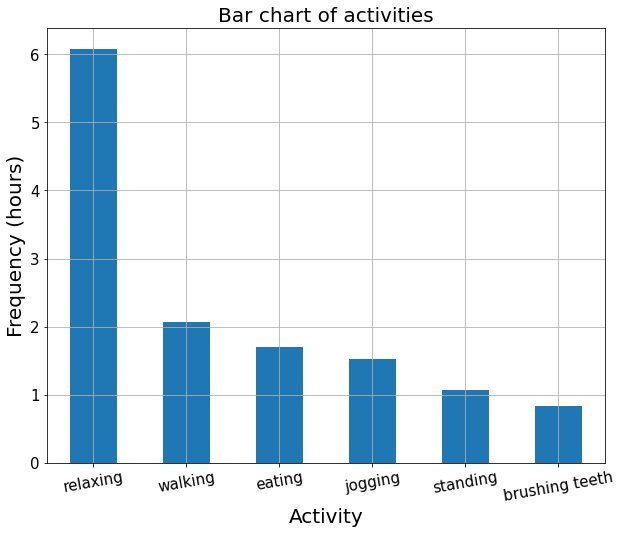

In [17]:
fontsize=20
title = "Bar chart of activities"
df_activities_counter = df_accel_gyro["ACTIVITY_ID"].value_counts()
df_activities_counter = activities_id_to_labels(df_activities_counter, to_hours=True)
df_activities_counter.plot.bar(figsize = (10, 8), fontsize=fontsize-5)
plt.grid(True)
plt.xticks(rotation=10)
plt.title(title, fontsize=fontsize)
plt.xlabel("Activity", fontsize=fontsize)
plt.ylabel("Frequency (hours)", fontsize=fontsize)
plt.savefig("../Graphs/" + title, facecolor = "white")
plt.show()

## Creating the data for the learning process

In [ ]:
sampling_frequency = df_accel_gyro.loc[1, "TIMESTAMP"] - df_accel_gyro.loc[0, "TIMESTAMP"]
# Finding the indexs where the samples differ more than sampling frequency
activities = df_accel_gyro.loc[df_accel_gyro['TIMESTAMP'] - df_accel_gyro['TIMESTAMP'].shift() > sampling_frequency]
# To include the last activity to the end
activities = activities.append(df_accel_gyro.iloc[-1])

# Constracting the data exactly how the seglearn needs it
# Data must be list(np.arrays)
# list() -> single multivariate time series
# X[0].shape -> (n_samples, n_variables)
# n_samples is how many data points we have in time we have
# n_variables is how many sensors we have

# I do not include the moment where activity changes
X = list()
y = list()
groups = list()
low_index = 0

# Use this to throw some samples or not?
samples_to_throw = 10

for i, high_index in enumerate(activities.index):
    low_index += samples_to_throw
    high_index -= samples_to_throw
    data = df_accel_gyro[["ACCEL_X","ACCEL_Y", "ACCEL_Z", "GYRO_X", "GYRO_Y", "GYRO_Z"]].iloc[low_index : high_index]
    data = data.to_numpy()
    labels = df_accel_gyro["ACTIVITY_ID"].iloc[low_index]
    user_id = df_accel_gyro["USER_ID"].iloc[low_index]
    
    X.append(data)
    y.append(labels)
    groups.append(user_id)
    
    #print(low_index, mid_index, high_index)
    low_index = high_index

In [ ]:
#ax = df_accel_gyro[["ACCEL_X","ACCEL_Y", "ACCEL_Z", "GYRO_X", "GYRO_Y", "GYRO_Z", "ACTIVITY_ID", "USER_ID"]].plot(figsize=(15,8))
#ax.vlines(activities.index, ymin=-20, ymax=120)

## Saving the preprocessed data

In [ ]:
np.save("./Preprocessed_Data/data", X)
np.save("./Preprocessed_Data/labels", y)
np.save("./Preprocessed_Data/groups", groups)

In [ ]:
df_accel_gyro.head()

In [ ]:
df_accel_gyro.to_csv("./Preprocessed_Data/Data.csv")